In [1]:
!pip install numpy networkx matplotlib pandas


,Player,Degree,Alpha,Heuristic Nash,Fixed-Point Nash,Difference
0,0,13,0.615635,0.692559,0.217461,0.475098
1,1,10,0.499997,0.599997,0.201390,0.398606
2,2,10,0.618608,0.718608,0.232885,0.485723
3,3,8,0.314110,0.439110,0.194792,0.244318
4,4,9,0.902516,1.013627,0.297757,0.715870
5,5,9,0.241679,0.352791,0.159997,0.192794
6,6,9,0.758234,0.869345,0.284697,0.584648
7,7,9,0.368389,0.479501,0.187568,0.291932
8,8,7,0.432748,0.575605,0.245084,0.330521
9,9,7,0.720396,0.863253,0.304204,0.559048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

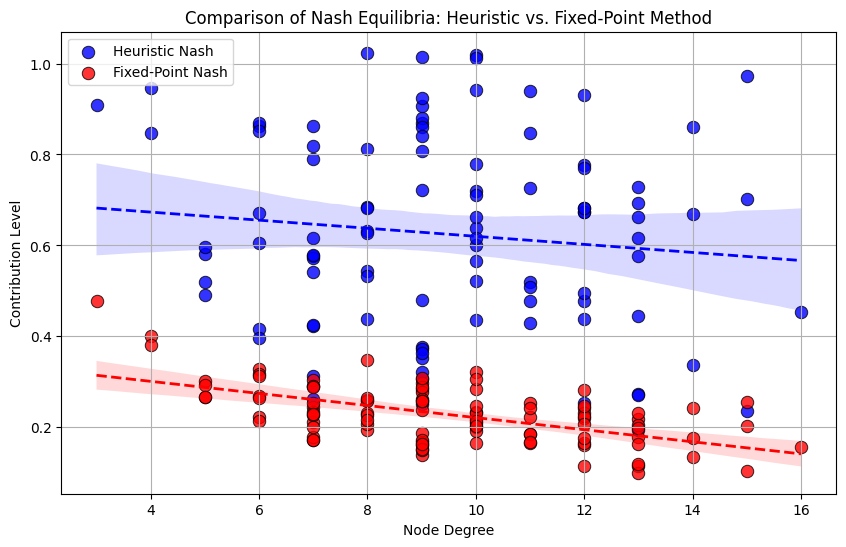

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Iterations for Fixed-Point Convergence: 16
Average Difference Between Methods: 0.3965997891152175


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files

# Set seed for reproducibility
np.random.seed(42)

# Model Parameters
n = 100  # Number of players (nodes in the network)
theta = 2  # Cost function exponent
beta = 2  # Public good multiplier
epsilon = 1e-5  # Convergence threshold
max_iter = 1000  # Maximum number of iterations

# Generate Erdős-Rényi graph (random network)
p = 0.1  # Probability of edge creation
network = nx.erdos_renyi_graph(n, p, seed=42)

# Convert network to adjacency matrix
adj_matrix = nx.to_numpy_array(network)

# Compute node degrees
degrees = np.array([network.degree(i) for i in range(n)])

# Assign altruism values using a Beta distribution (more realistic than normal)
alpha = np.random.beta(2, 2, size=n)  # Symmetric distribution around 0.5

# Ensure no division by zero in heuristic and FP Nash calculations
safe_degrees = np.where(degrees > 0, degrees, 1e-8)

# 1. Heuristic Nash Equilibrium Calculation
c_heuristic = np.array([
    ((beta / (theta * safe_degrees[i])) * (1 + alpha[i] * degrees[i])) ** (1 / (theta - 1))
    if degrees[i] > 0 else 0 for i in range(n)
])

# 2. Fixed-Point Iterative Best Response Nash Equilibrium Calculation
c_fp = np.zeros(n)  # Keep initial values as zeros for fair comparison
c_new = np.zeros_like(c_fp)

for iteration in range(max_iter):
    for i in range(n):
        neighbor_contributions = adj_matrix[i, :] @ c_fp  # Sum of neighbors' contributions
        if degrees[i] > 0:
            c_new[i] = ((beta / (theta * safe_degrees[i])) * (1 + alpha[i] * neighbor_contributions)) ** (1 / (theta - 1))
        else:
            c_new[i] = 0

    # Check for convergence based on average absolute difference
    if np.mean(np.abs(c_new - c_fp)) < epsilon:
        break

    c_fp = c_new.copy()

# Store results in a DataFrame
results_df = pd.DataFrame({
    "Player": np.arange(n),
    "Degree": degrees,
    "Alpha": alpha,
    "Heuristic Nash": c_heuristic,
    "Fixed-Point Nash": c_fp,
    "Difference": np.abs(c_heuristic - c_fp)
})

# Display the first few rows
from IPython.display import display
display(results_df.head(10))

# Save the table as CSV (optional)
results_df.to_csv("nash_equilibrium_comparison.csv", index=False)

# Download the CSV file
from google.colab import files
files.download("nash_equilibrium_comparison.csv")

# Improved Visualization
plt.figure(figsize=(10, 6))

# Scatter plot for Heuristic Nash
sns.scatterplot(x=degrees, y=c_heuristic, label="Heuristic Nash", alpha=0.8, edgecolor="black", s=80, color="blue")

# Scatter plot for Fixed-Point Nash
sns.scatterplot(x=degrees, y=c_fp, label="Fixed-Point Nash", alpha=0.8, edgecolor="black", s=80, color="red")

# Add trend lines for both methods
sns.regplot(x=degrees, y=c_heuristic, scatter=False, color="blue", line_kws={"linestyle": "dashed", "linewidth": 2})
sns.regplot(x=degrees, y=c_fp, scatter=False, color="red", line_kws={"linestyle": "dashed", "linewidth": 2})

# Labeling
plt.xlabel("Node Degree")
plt.ylabel("Contribution Level")
plt.title("Comparison of Nash Equilibria: Heuristic vs. Fixed-Point Method")
plt.legend()
plt.grid(True)

# Save and show the plot
plt.savefig("nash_equilibrium_comparison_plot.png", dpi=300, bbox_inches="tight")
plt.show()

# Download the plot to the local system
files.download("nash_equilibrium_comparison_plot.png")

# Print summary statistics
print(f"Iterations for Fixed-Point Convergence: {iteration + 1}")
print(f"Average Difference Between Methods: {np.mean(np.abs(c_heuristic - c_fp))}")

# Download file (if running in Colab)
files.download("nash_equilibrium_comparison_plot.png")
